In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumer_key = 'LrSxpWHRWjwa2h8R4SQOZJUIV'
consumer_secret_key = '8d3xWVMKm6LpXDIbZW930I5eiH0kb0jhtNr8pvSHkABm63qPh9'
access_token = '1334421915549585408-8HocCnFw9QvWCZLXbei8QL5BrwfFi4'
access_token_secret = 'DePvAq20EWinXLyCi82cfPYIedfAamMMRXet5L40e8XWO'

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [7]:
posts = api.user_timeline(screen_name="Pfizer", count=1000, lang="en", tweet_mode="extended")

# Print the last 10 tweets
print("Show the 10 recent tweets:\n")
i=1
for tweet in posts[:10]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1

Show the 10 recent tweets:

1) RT @AlbertBourla: Every day, I’m asked variations of the same question: How will @Pfizer &amp; @BioNTech_Group rapidly, seamlessly distribute o…

2) #PfizerProud to announce that our scientists have dosed the first patients in a Phase 2 trial. This is a novel investigational medicine that is being researched for restoration of bone growth in children born with #Achondroplasia, the most common form of dwarfism. Learn more:

3) We’re applying scientific innovation to help fight climate change by reducing our carbon emissions and the environmental impact of our medicines. Learn more about our renewed climate action commitments here: https://t.co/xhKNjCvzid

4) RT @AlbertBourla: Terrific to see this message outside our office in Collegeville, PA. I’m sure it brought #joy to our colleagues there. Th…

5) A weekend away in nature can be life changing for women with #BreastCancer. We’re joining @Cast4Recovery on Dec 16 at 12pm ET on Facebook and LinkedIn for a l

In [8]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 10 rows of data
df.head()

,Tweets
0,"RT @AlbertBourla: Every day, I’m asked variati..."
1,#PfizerProud to announce that our scientists h...
2,We’re applying scientific innovation to help f...
3,RT @AlbertBourla: Terrific to see this message...
4,A weekend away in nature can be life changing ...


In [9]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,": Every day, I’m asked variations of the same ..."
1,PfizerProud to announce that our scientists ha...
2,We’re applying scientific innovation to help f...
3,: Terrific to see this message outside our off...
4,A weekend away in nature can be life changing ...
...,...
195,What’s the latest when it comes to protecting ...
196,"In recognition of HispanicHeritageMonth, learn..."
197,"As the threat of InfectiousDiseases grows, The..."
198,78486298 If you are interested in employment w...


In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,": Every day, I’m asked variations of the same ...",0.112500,0.050000
1,PfizerProud to announce that our scientists ha...,0.458333,0.237500
2,We’re applying scientific innovation to help f...,0.300000,0.300000
3,: Terrific to see this message outside our off...,0.534722,0.325000
4,A weekend away in nature can be life changing ...,0.700000,0.468182
...,...,...,...
195,What’s the latest when it comes to protecting ...,0.510714,0.303571
196,"In recognition of HispanicHeritageMonth, learn...",0.500000,0.500000
197,"As the threat of InfectiousDiseases grows, The...",0.500000,0.333333
198,78486298 If you are interested in employment w...,0.350000,0.250000


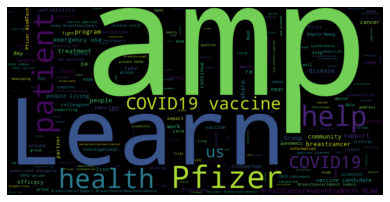

In [13]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=800, height=400, random_state=20, max_font_size=700).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
pip install WordCloud

In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,": Every day, I’m asked variations of the same ...",0.112500,0.050000,Positive
1,PfizerProud to announce that our scientists ha...,0.458333,0.237500,Positive
2,We’re applying scientific innovation to help f...,0.300000,0.300000,Positive
3,: Terrific to see this message outside our off...,0.534722,0.325000,Positive
4,A weekend away in nature can be life changing ...,0.700000,0.468182,Positive
...,...,...,...,...
195,What’s the latest when it comes to protecting ...,0.510714,0.303571,Positive
196,"In recognition of HispanicHeritageMonth, learn...",0.500000,0.500000,Positive
197,"As the threat of InfectiousDiseases grows, The...",0.500000,0.333333,Positive
198,78486298 If you are interested in employment w...,0.350000,0.250000,Positive


In [16]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) : Every day, I’m asked variations of the same question: How will  &amp; _Group rapidly, seamlessly distribute o…

2) PfizerProud to announce that our scientists have dosed the first patients in a Phase 2 trial. This is a novel investigational medicine that is being researched for restoration of bone growth in children born with Achondroplasia, the most common form of dwarfism. Learn more:

3) We’re applying scientific innovation to help fight climate change by reducing our carbon emissions and the environmental impact of our medicines. Learn more about our renewed climate action commitments here: 

4) : Terrific to see this message outside our office in Collegeville, PA. I’m sure it brought joy to our colleagues there. Th…

5) A weekend away in nature can be life changing for women with BreastCancer. We’re joining 4Recovery on Dec 16 at 12pm ET on Facebook and LinkedIn for a live discussion about how they use fly fishing as a form of therapy.  HealthEquity

In [17]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) What are the differences between the symptoms for COVID19 and other common respiratory viruses? Read:  

2) What are the differences between the symptoms for COVID19 and other common respiratory viruses? Read:  

3) Q: How is the cold chain distribution for the Pfizer-BioNTech investigational vaccine being managed? (7/7) 

A: 

4) 2020 has been a difficult year for many, but if you can’t shake the negative feelings, it may be a sign of chronicstress.  

5) Let’s bust some myths about antibiotics! Always take antibiotics for as long as your doctor tells you and NEVER share them.  Plus, antibiotics have no effect on common colds, 6 which are caused by viruses WAAW2020 StopSuperbugs ActAgainstAMR🦠

6) Cancer screenings have decreased due to COVID19, but cancer doesn’t wait. Doctors' offices are likely taking steps to make visits safer, from wearing masks to using virtual visits. Visit “Get It Done” to find resources for your next appointment.

7) Type2Diabete

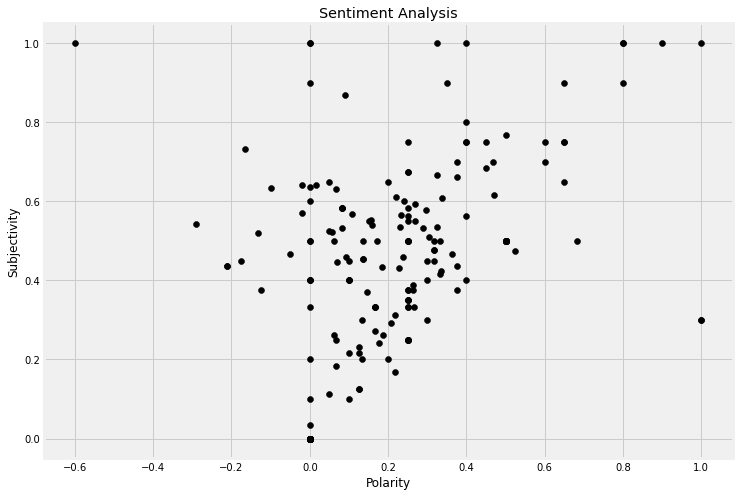

In [21]:
# Plotting 
plt.figure(figsize=(11,8)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='black') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [23]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 1000 , 1)

720.0

In [24]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 1000, 1)

60.0

In [25]:
# Show the value counts
df['Analysis'].value_counts()

Positive    144
Neutral      44
Negative     12
Name: Analysis, dtype: int64

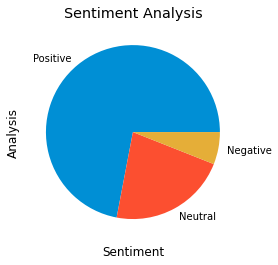

In [26]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'pie')
plt.show()

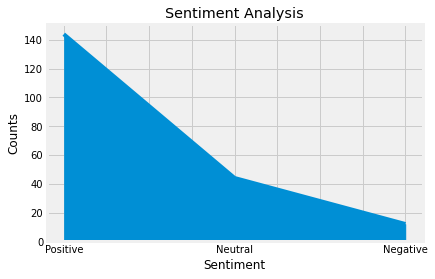

In [30]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()